QUESTIONS I WILL ANSWER
- Pattern Focused: What are the most common words and phrases in positive tweets versus negative tweets? - Bar Chart
- Length of Message Focused: Does the length of a tweet correlate with its sentiment? Such as are shorter tweets more often positive or negative? - Box Plot
- Day of Time Trends Focused: Are there specific times or days when positive or negative tweets are more common? - Line Graph

In [1]:
# import everything you need 
import pandas as pd # for data manipulation and preprocessing
import numpy as np 
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

In [2]:
# need to rename columns for a cleaner look
column_names = ['sentiment', 'id', 'date', 'query', 'user', 'tweet']

#LOAD/Import DATA 
analysis_title = pd.read_csv("training.1600000.processed.noemoticon.csv", names=column_names, header=None, )

# remove irrevelant info I will not use
analysis_title = analysis_title.drop(columns=['id','query', 'user'])

# be more clear on what the sentiment lands on
analysis_title['sentiment'] = analysis_title['sentiment'].replace({0: 'negative', 2: 'neutral', 4: 'positive'})

# print shape of DataFrame (number of rows and columns)
analysis_title.shape


(1600000, 3)

In [3]:
# this shows the example of first 5 rows to show my 3 colums and 160000 rows
analysis_title.head()

,sentiment,date,tweet
0,negative,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negative,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
2,negative,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
3,negative,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,negative,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."


In [4]:
#my goal is to make this visualizations
#TOP 10 MOST COMMON WORDS IN POSITIVE TWEETS
#TOP 10 MOST COMMON WORDS IN NEGATIVE TWEETS

# i need to clean the tweets
# let me remove irrevalant parts of a tweet
import re # important for regular expressions

def cleanuptweets(tweets): 
    # convert all text to lowercase for direct readabilty
    tweets = tweets.lower()
    # remove all URLs/links from the text
    tweets = re.sub(r'https?://\S+|www\.\S+', '', tweets)
    # remove all @'s and users they are @'tting
    tweets = re.sub(r'@\w+', '', tweets)
    # remove hashtag and words with it
    tweets = re.sub(r'#\w+', '', tweets)
    # remove any character that is not a letter or a space
    tweets = re.sub(r'[^a-z\s]', '', tweets)
    return tweets

analysis_title['cleaned_tweet'] = analysis_title['tweet'].apply(cleanuptweets)

#this prints w new column
analysis_title.head()

,sentiment,date,tweet,cleaned_tweet
0,negative,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,negative,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,negative,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,negative,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,negative,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


In [5]:
# to get the top 10 words of either sentiment i will get the words count
# i also need to make sure the top 10 words are unique instead of basic generic words

from collections import Counter # useful for frequencies

# this is a set of common words that i need to remove because they dont have strong positive and negative meaning
commonwords = {'a', 'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'both', 'but', 'by', 'can', 'could', 'did', 'do', 'does', 'doing', 'down', 'day','during', 'each', 'few', 'for', 'from','get','going','got', 'had', 'has', 'have', 'having', 'he', 'her', 'here', 'hers', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'more', 'most', 'my', 'nor','now', 'not', 'of', 'on', 'once', 'only', 'or', 'other', 'out', 'over', 'own', 'same', 'she', 'should', 'so', 'some', 'such', 'than', 'that', 'the', 'their', 'theirs', 'them', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'very', 'was', 'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'why', 'with', 'would', 'you', 'your'}

# function to get all word counts for a given sentiment
def getwordcounts(analysis_title, sentiment):
    # under tweets by the sentiment
    filterdataframe = analysis_title[analysis_title['sentiment'] == sentiment]
    #put all cleaned_tweet words in a string and spilt it with a space
    allwords = ' '.join(filterdataframe['cleaned_tweet']).split()

    # used to keep words that are not in common words or have a less that 2 length in a list
    filteredwords = [
        word for word in allwords 
        if word not in commonwords and len(word) > 2
    ]
    # is gets frequency of each word in the filtered word list
    return Counter(filteredwords) 

# get word counts
positivecounts = getwordcounts(analysis_title, 'positive')
negativecounts = getwordcounts(analysis_title, 'negative')

# most_common is part of the counter collection
print("Positive:", positivecounts.most_common(10))
print("Negative:", negativecounts.most_common(10))

 # use empty set and add all unique words from both sentiments
all_words = set() 

for word in positivecounts:
    all_words.add(word)

for word in negativecounts:
    all_words.add(word)

# make empty list to store words
uniquepositivewords = []
uniquenegativewords = []

for word in all_words:
    pos_count = positivecounts.get(word, 0)
    neg_count = negativecounts.get(word, 0)
    total_count = pos_count + neg_count

    #unique score
    uniquescore = pos_count / total_count

    # if score is closer to 1 its positive else its negative
    if uniquescore > 0.8: 
        uniquepositivewords.append((word, pos_count))
    elif uniquescore < 0.2: 
        uniquenegativewords.append((word, neg_count))

# Sort the unique words by their count to find the most frequent ones
def get_count(indexcount):
    return indexcount[1]

# Sort the lists
#uses count to sort the words
# high to low
uniquepositivewords.sort(key=get_count, reverse=True)
uniquenegativewords.sort(key=get_count, reverse=True)

# this will print the ten unique positive and negative words
print("Top 10 Unique Positive Words:", uniquepositivewords[:10])
print("Top 10 Unique Negative Words:", uniquenegativewords[:10])


Positive: [('good', 60864), ('love', 46848), ('like', 37116), ('thanks', 33750), ('lol', 33505), ('time', 29349), ('will', 29124), ('today', 28429), ('new', 26640), ('one', 25840)]
Negative: [('dont', 45158), ('work', 44035), ('cant', 43766), ('like', 40665), ('today', 36209), ('back', 32525), ('really', 31230), ('miss', 30506), ('want', 29736), ('still', 28765)]
Top 10 Unique Positive Words: [('thanks', 33750), ('thank', 15406), ('welcome', 6561), ('hello', 4386), ('hehe', 3801), ('congrats', 3244), ('wonderful', 3146), ('smile', 2654), ('thx', 2131), ('proud', 1913)]
Top 10 Unique Negative Words: [('miss', 30506), ('sad', 27136), ('hate', 17042), ('sick', 14174), ('sucks', 9672), ('lost', 9347), ('ugh', 8313), ('poor', 7213), ('missing', 7096), ('hurts', 7062)]


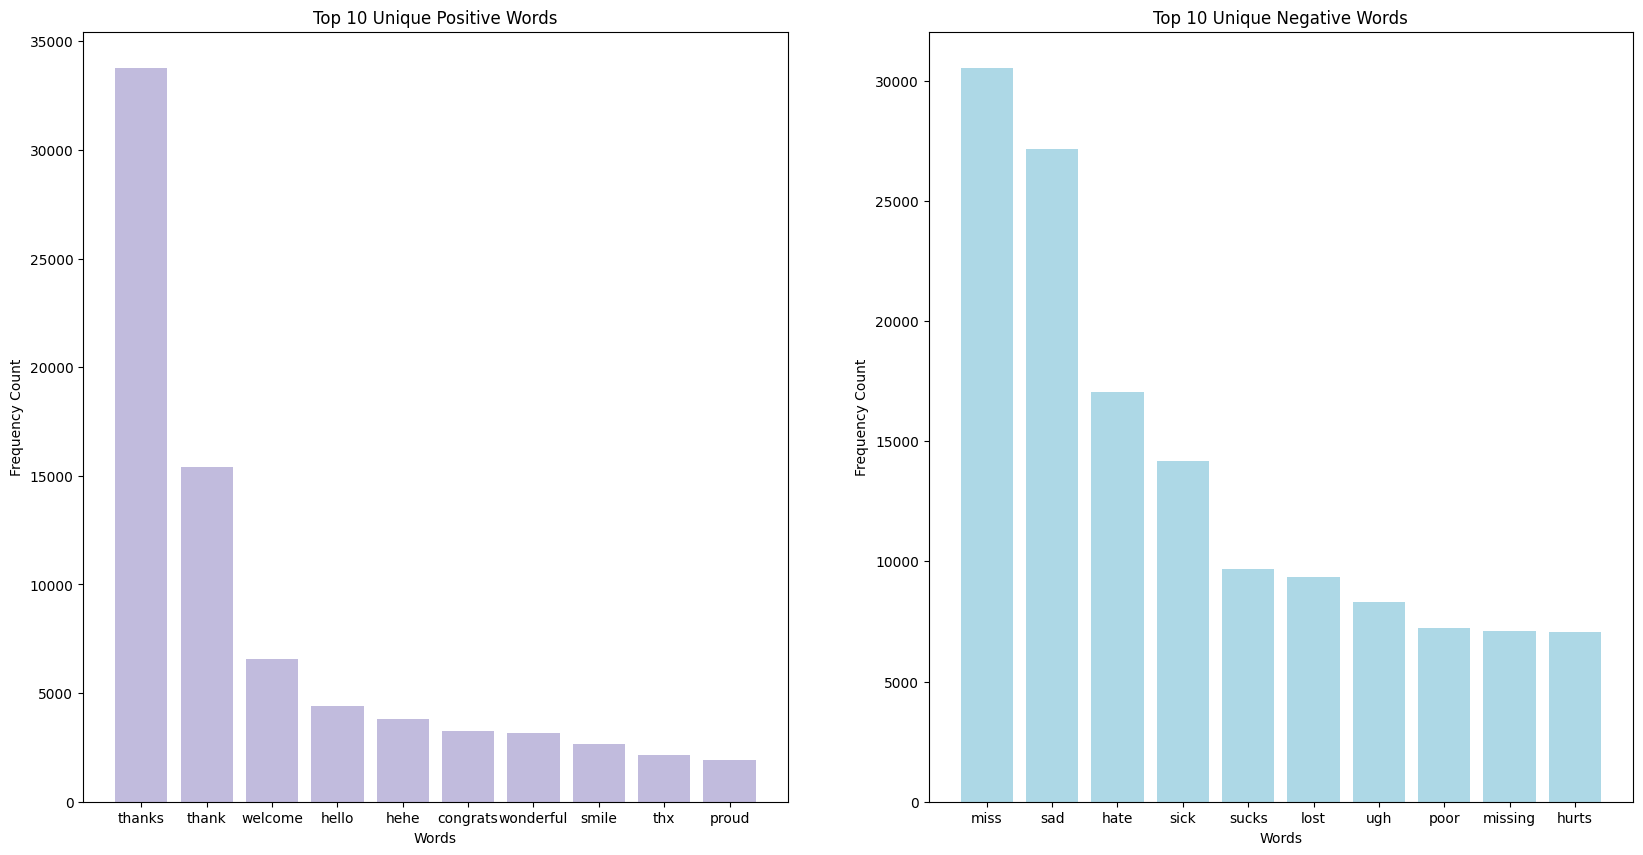

In [6]:
#Pattern Focused: What are the most common words and phrases in positive tweets versus negative tweets? - Bar Chart
#USE MATPLOTLIB TO CODE THE BARCHART FOR THE RESULTS ABOVE
# matplotlib was already imported

positive_words = [word for word, count in uniquepositivewords[:10]]
positive_counts = [count for word, count in uniquepositivewords[:10]]

negative_words = [word for word, count in uniquenegativewords[:10]]
negative_counts = [count for word, count in uniquenegativewords[:10]]

# two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

#positive words on the first subplot 
# x, y, color
ax1.bar(positive_words, positive_counts, color='#C1BBDD')
ax1.set(title='Top 10 Unique Positive Words', xlabel='Words', ylabel='Frequency Count')

# negative words on the second subplot
ax2.bar(negative_words, negative_counts, color='#ADD8E6')
ax2.set(title='Top 10 Unique Negative Words', xlabel='Words', ylabel='Frequency Count')

# call to show
plt.show()


In [ ]:
# Length of Message Focused: Does the length of a tweet correlate with its sentiment?
# Such as are shorter tweets more often positive or negative?
# for this I will create a box plot
# I will get the length of each tweet that has not been cleaned so column 3
# make new colum called tweet length from column 3
analysis_title['tweet_length'] = analysis_title['tweet'].str.len()

analysis_title.head()

,sentiment,date,tweet,cleaned_tweet,tweet_length
0,negative,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...,115
1,negative,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,111
2,negative,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...,89
3,negative,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,47
4,negative,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...,111


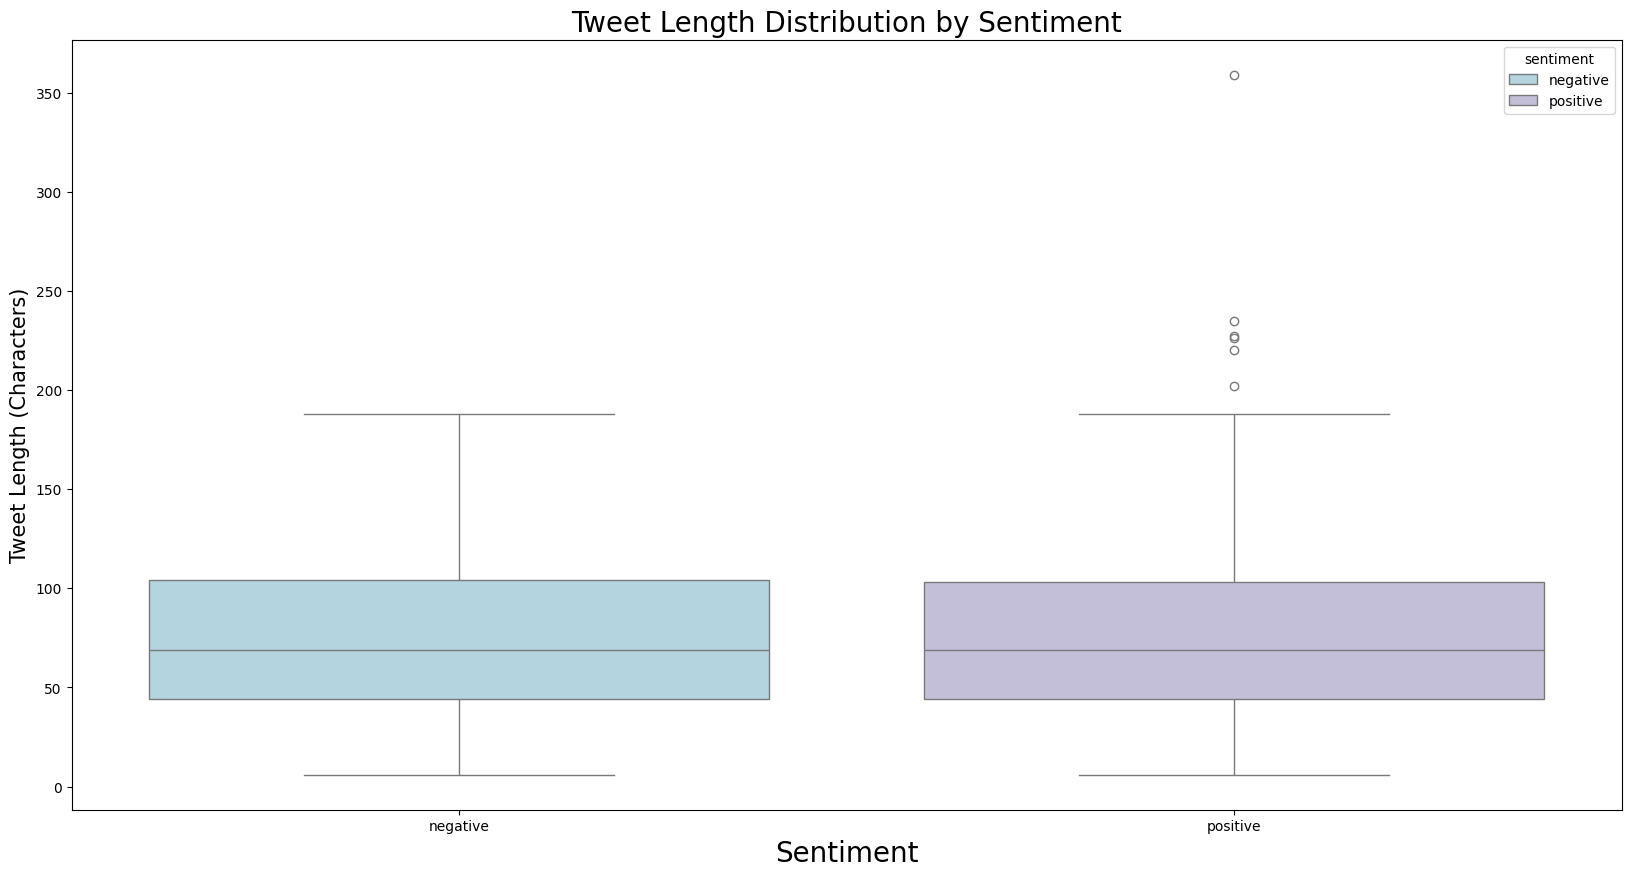

              count       mean        std  min   25%   50%    75%    max
sentiment                                                               
negative   800000.0  74.272065  36.715606  6.0  44.0  69.0  104.0  188.0
positive   800000.0  73.811471  36.055962  6.0  44.0  69.0  103.0  359.0


In [8]:
# box plot creation w matplotlib and seaborn
plt.figure(figsize=(20, 10))
# colors
addcolors =  ['#ADD8E6', '#C1BBDD']
# make boxplot w labels
sns.boxplot(x='sentiment', y='tweet_length', data=analysis_title, hue='sentiment', palette=addcolors, legend=True )
plt.title('Tweet Length Distribution by Sentiment', fontsize=20)
plt.xlabel('Sentiment', fontsize=20)
plt.ylabel('Tweet Length (Characters)', fontsize=15)
plt.show()

# describe statistics for box plot
print(analysis_title.groupby('sentiment')['tweet_length'].describe())

In [12]:
# Day of Time Trends Focused: Are there specific times or days when positive or negative tweets are more common? 
# I will be creating a Line Graph for this

#get the hour of the day (0-23)
analysis_title['hour'] = analysis_title['date'].dt.hour
analysis_title.head()

,sentiment,date,tweet,cleaned_tweet,tweet_length,hour
0,negative,2009-04-06 22:19:45,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...,115,22
1,negative,2009-04-06 22:19:49,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,111,22
2,negative,2009-04-06 22:19:53,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...,89,22
3,negative,2009-04-06 22:19:57,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,47,22
4,negative,2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...,111,22


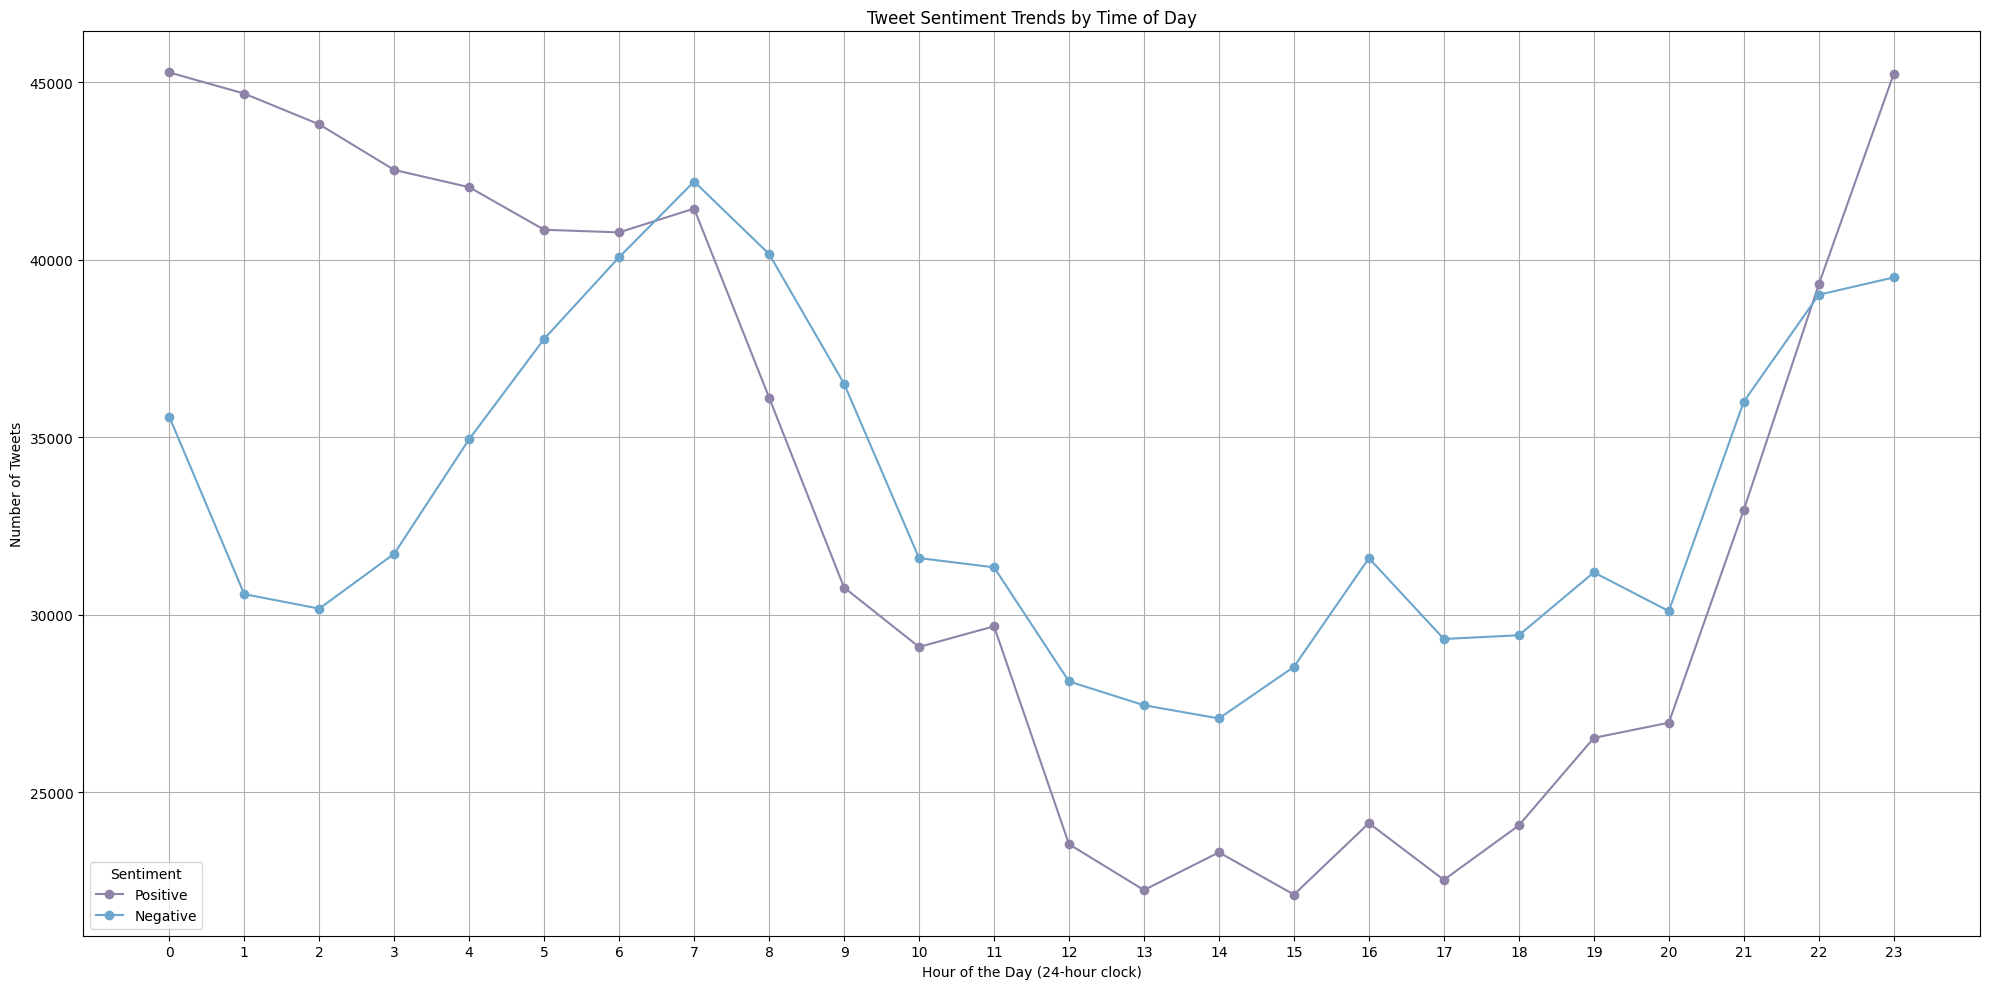

In [13]:
# get positive and negative tweets for each hour.
sentimentbyhour = analysis_title.groupby(['hour', 'sentiment']).size().unstack(fill_value=0)

# make line graph.
# size
plt.figure(figsize=(20, 10))
# label/marks
plt.plot(sentimentbyhour.index, sentimentbyhour['positive'], label='Positive', color='#8F84A8',marker='o')
plt.plot(sentimentbyhour.index, sentimentbyhour['negative'], label='Negative',color='#6CA6CD',marker='o')
# labels
plt.title('Tweet Sentiment Trends by Time of Day')
plt.xlabel('Hour of the Day (24-hour clock)')
plt.ylabel('Number of Tweets')
# for every hour in the day
plt.xticks(range(0, 24, 1))
# grid so its more readable
plt.grid(True)
# legend so you know what line is what
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()